<a href="https://colab.research.google.com/github/prabalaji95/pranavbalaji.school/blob/main/Simple_neural_network_for_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Fully Connected Neural Network Example

In this tutorial, we will implemnet a simple fully connected neural network with TensorFlow.




![GettingStarted](https://mooc-styleguide.s3.amazonaws.com/MOOC-Styles/Active+Learning+Headers/Links/ALH_GettingStarted.png)


#[Step 1] **READ**: Simple Digit Recognition with Neural Network

In the prescriptions, doctors have different hand writing styles. When we have the hand written digit pictures, it might be hard to recognize someone's handwriting on the first sight. What would be a better way to scan the pictures and extract key information? Can we apply AI to simplify the process?

##  AI-Driven Solution: Simple Fully Connected Neural Network

By building a simple neural network model, we could ask AI to help us capture the features in each picture and training our model to recognize the digits.

<br>

---


## Simple Neural Network Overview
![Simple NN](https://research.aimultiple.com/wp-content/uploads/2017/08/neural-network.png)



### MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](https://miro.medium.com/max/530/1*VAjYygFUinnygIx9eVCrQQ.png)

More info: http://yann.lecun.com/exdb/mnist/

#[Step 2] **RUN**: Setting Up the Colab Environment

**Importing Packages**

Python packages enable different functions, providing easy ways of manipulating data and building models. As a first step, we 'import' packages to set up our environment in a way that allows us to take advantage of different capabilities.


In [ ]:
# use TF2
%tensorflow_version 2.x

import numpy
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
K.set_image_data_format('channels_first')

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


**Set the seed**
<br>
Setting the seed will keep the starting number used to generate a sequence of random numbers the same – it ensures that you get the same result if you start with that same seed each time you run the same process. Using a constant seed value will give us reproducibility of results.

<br>

The randomization part is the initialization on the model parameters.

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()


**Loading Dataset**


The MNINST train and test datasets are splited by the authors at the very beginning.

It can enable a consistent metric for evaluating different classification models.

<br>

For more information, please see [MINST Dataset](http://yann.lecun.com/exdb/mnist/)


In [ ]:
# load data
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# [Step 3] MNIST Data Exploration

## X Data

In [ ]:
print('In the Train dataset, there are 60,000 images (data points). Each image (data point) is a 28 * 28 matrix.')
print(X_train_raw.shape)
print('\n')


print('In the Test dataset, there are 10,000 images (data points). Each image (data point) is a 28 * 28 matrix.')
print(X_test_raw.shape)

In the Train dataset, there are 60,000 images (data points). Each image (data point) is a 28 * 28 matrix.
(60000, 28, 28)


In the Test dataset, there are 10,000 images (data points). Each image (data point) is a 28 * 28 matrix.
(10000, 28, 28)


In [ ]:
y_train_raw.shape

(60000,)

In [ ]:
import numpy as np
def pretty_print(np_array):
    array_str = np.array_repr(np_array).replace('],\n', '**').replace('\n       ', '').replace('**', '],\n')#.replace(', ', '')
    print(array_str)

sample_idx = 10
X_sample = X_train_raw[sample_idx]
pretty_print(X_sample)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254, 254, 254, 254, 254, 238,  70,   0

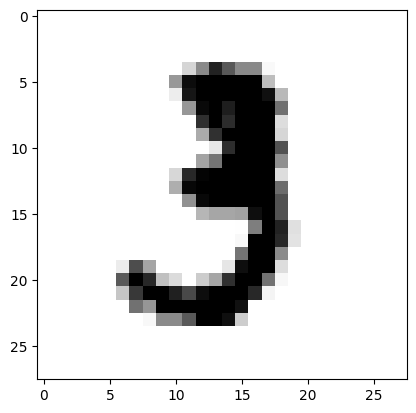

In [ ]:
from matplotlib import pyplot as plt

#print(plt.cm.cmap_d.keys())
plt.imshow(X_sample, cmap = plt.cm.binary)

# [Step 4] Data Preprocession



## X: Normalize the Data to [0,1]



<br>
In the case of RGB, the first dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

Then we normalize the pixel values to the range 0 and 1.

**Why normalize?**

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1

[Read more about normalization here](https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/#:~:text=Normalize%20Pixel%20Values,-For%20most%20image&text=Neural%20networks%20process%20inputs%20using,value%20between%200%20and%201.)

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train_raw / 255
X_test  = X_test_raw  / 255


print(X_train.shape)

(60000, 28, 28)


## y Transformation

We don't have specific transformation for `y` data



In [ ]:
y_train = y_train_raw
y_test  = y_test_raw

#[Step 5] **RUN**: Setting Up the Neural Network Architecture

**Design the neural network architecture**

1. First, we are going to create the model framework. It is like the basic structure of a house without furniture and room layouts
2. Next we will add the flatten layer which we can input an image. This layer will flatten the image to a vector so we can pass it in to the neural network. Each pixel of the image will become an individual input that feeds in the next hidden layer
3. The next layer is a fully connected with 128 neurons. Because the neurals are all close to each other, we cal it the "dense" layer . Each neuron on this layer are fully connected to the last layer. It takes the input from last layer, aggregate them and run them through a "Relu" function. "Relu" is an activation function which will transform the aggregated result in each neuron
4. The next layer is our output layer. The output layer has 10 neurons because we have 10 different digits in this classification problems. We feed the results from last layer to a softmax activation function to output probability-like predictions for each class. The digits with the highest probability is what the algorithm thought the digit to be
5. The model is trained using categorical cross entropy loss function and the ADAM optimizer for gradient descent.

**Now we are going to define a function to help us create a base model with the layers we dicussed**

Quick note: we use the **"def"** keyword in python to define a function. By defining a function, it increases the reusability and save us time when we want to create the same model. So that we don't have to write out all the layers every time.


In [ ]:
def baseline_model():
    # Create a model
    model = Sequential()
    # Add different layers to your model
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

---
![APPLY](https://mooc-styleguide.s3.amazonaws.com/MOOC-Styles/Active+Learning+Headers/Links/ALH_Apply.png)
#[Step 6] **APPLY**: Train Fully Connected Neural Network for Digit Recognition on Train Set

With our environment set up and data loaded, we can now train, test, and evaluate our model to recognize the 10 different digits. To do this, we will use the train set and test set we created in step 2 to train our model.
Running the example, the accuracy on the training and validation test is printed each epoch and at the end of the classification error rate is printed.


**Train the model**


In [ ]:
# Call the function we defined earlier to create the model
# The trainable parameters within the new model are set by the default initialization methods from Keras.
model = baseline_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 50)                1650      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 28336 (110.69 KB)
Trainable params: 28336 (110.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model using the picture stored in X_train and the corresponding labels stored in Y_train
model.fit(X_train, y_train, epochs=5, batch_size=200, verbose=1) #verbose =1 will show the progress bar

Epoch 1/5
300/300 [==============================] - 3s 7ms/step - loss: 0.5803 - accuracy: 0.8322
Epoch 2/5
300/300 [==============================] - 1s 4ms/step - loss: 0.2397 - accuracy: 0.9302
Epoch 3/5
300/300 [==============================] - 1s 4ms/step - loss: 0.1859 - accuracy: 0.9452
Epoch 4/5
300/300 [==============================] - 1s 4ms/step - loss: 0.1561 - accuracy: 0.9545
Epoch 5/5
300/300 [==============================] - 1s 4ms/step - loss: 0.1360 - accuracy: 0.9600


# [Step 7] Evaluate the Model Performance on the Test Set

<br>
X_test include the new digit images the model has never seen
<br>
y_test include the correct labels of the test set





In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0) # scores has [loss] and [accuracy]
#Print out the error rate
print('Simple NN Accuracy: %.2f%%'% (scores[1]*100))
print("Simple NN Error:    %.2f%%"% (100-scores[1]*100))

Simple NN Accuracy: 95.82%
Simple NN Error:    4.18%


# ** By now, the job is done. However, it is always good to inspect results carefully. **

#[Step 8] Define a function to display the image and the predicted label to check model performance

In [ ]:
# Make predictions using the model
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = numpy.argmax(predictions_array)
    # if the algorithm makes the right prediction, it will show a blue text, otherwise show in red text
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*numpy.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = numpy.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

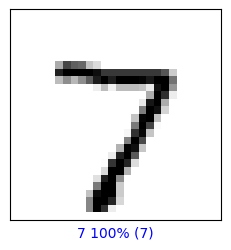

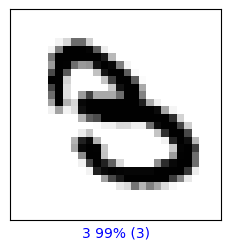

In [ ]:
# Load the data and create a list of class names
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Let's examine the 1st and the 19th image to check for accuracy
image_sample_idxes = [0, 18]
for i in image_sample_idxes:
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions, y_test_raw, X_test_raw)

In [ ]:
# Time to check the ones that the algorithm missed


def check_wrong(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    predicted_label = numpy.argmax(predictions_array)
    if predicted_label == true_label:
        return False
    else:
        return True


wrong_prediction_images_index = []
for i in range(len(predictions)):
    if check_wrong(i, predictions, y_test_raw, X_test_raw) == True:
        wrong_prediction_images_index.append(i)

print(wrong_prediction_images_index[:10])
print(len(wrong_prediction_images_index))

[8, 124, 149, 195, 241, 247, 259, 320, 321, 340]
418


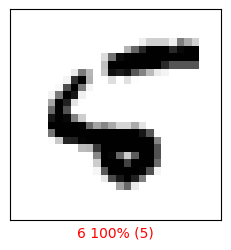

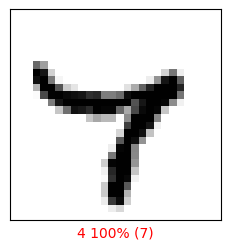

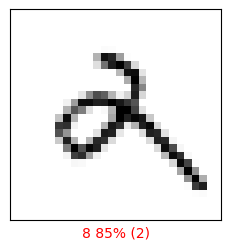

In [ ]:
def plot_wrong(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    predicted_label = numpy.argmax(predictions_array)
    if predicted_label == true_label:
        pass
    else:
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(i, predictions, y_test_raw, X_test_raw)

# We are going to check the first 100 images to see which one the model predicted wrong

top_k = 3
for i in wrong_prediction_images_index[:top_k]:
    plot_wrong(i, predictions, y_test_raw, X_test_raw)

---
![Learn](https://mooc-styleguide.s3.amazonaws.com/MOOC-Styles/Active+Learning+Headers/Links/ALH_Learn.png)


# [Step 9] **READ**: Conclusions
This is a relatively simple and easy to understand model for us to get a view of how powerful neural network is in classification problems like digit recognition. We introduced the basic framework to create and train the fully connected neural network for our own use. We will get more in-depth into other image recognition topics later on in the course. But now let's discuss some of the questions you have.

**What are some use cases to apply the image recognition algorithm in your everyday work?**


*   
*   



**Q2...**


*   
*   

**Q3...**
*
*

---
![Practice](https://mooc-styleguide.s3.amazonaws.com/MOOC-Styles/Active+Learning+Headers/Links/ALH_Practice.png)
# [Step 10] **LIVE SESSION PRACTICE**: Try Your Own Model!
* Currently the model's accuracy is around 93%, not too bad. But can you think of ways to push the accuracy over 95%?


<br>


> (Hint) We trained the model with 5 epoches (i.e., going through the whole training dataset five times using backpropagation). Do you think the model has learned enough? Can we make it learn more by doing 10 epoches? Try it and see.

Other tips:

* redistribute the neurons between the two hidden layers
* change the model structure by adding more layers
* change the activation function to a fancier one called "softmax"


<br>
<br>
Once you have modified the model, you can run it by clicking "Runtime/Restar and run all". Do you see the accuracy increased as a result?

<br>
<br>


Have fun!



In [ ]:
# Credit to Jason Brownlee
# https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/